# Baseball Case Study:

Subitted by - Prashant Shekhar 


Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)


## Importing dataset

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data

df=pd.read_csv("D:\Baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### Here i have to predict the number of wins and it is Continous Data,so we can say that it is a Regression Problem.

## EDA:

In [3]:
#Checking shape of the dataset
df.shape

(30, 17)

30 rows and 17 columns.

In [4]:
#Checking all column names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
#Checking the data types of all columns
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [6]:
#Checking Null Values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No Null Values Present

In [7]:
#Checking description of data set
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## Visualization:

Univariate Analysis:

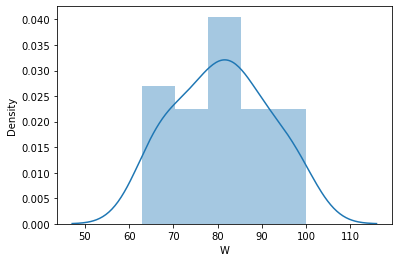

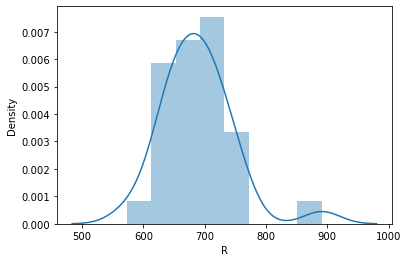

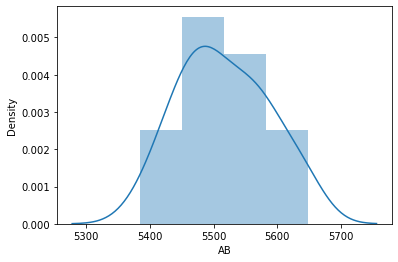

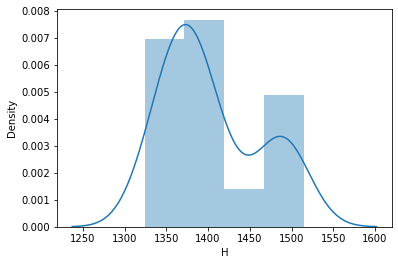

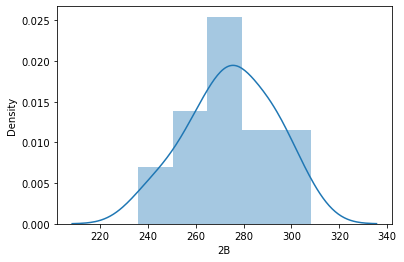

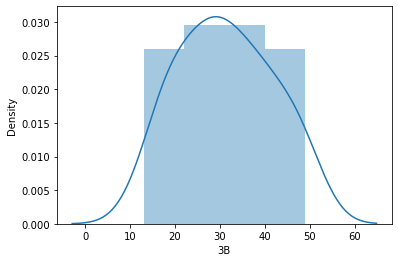

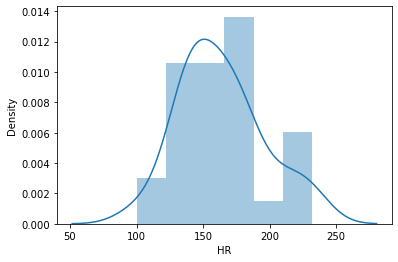

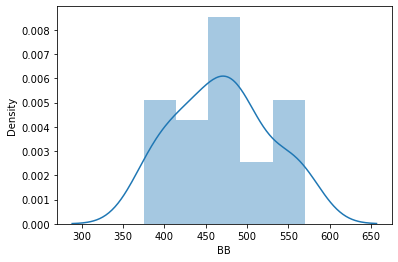

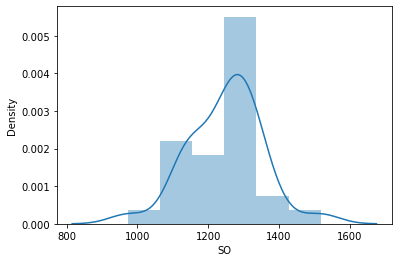

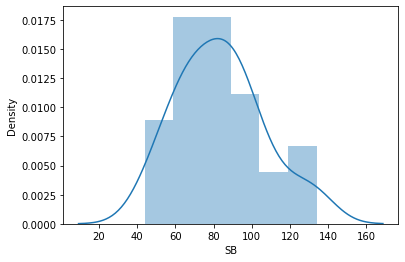

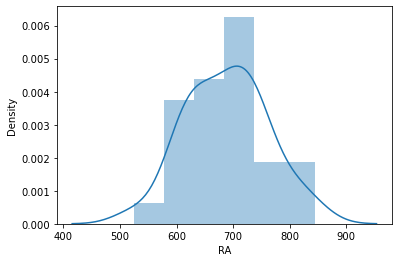

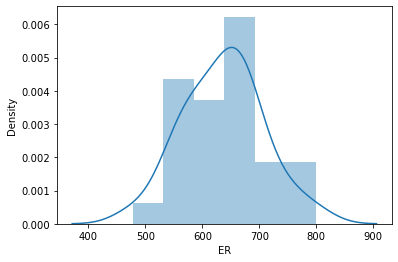

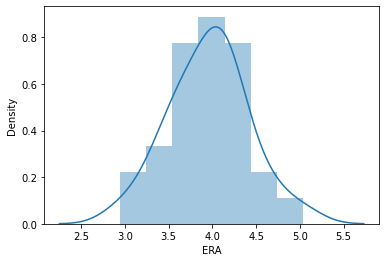

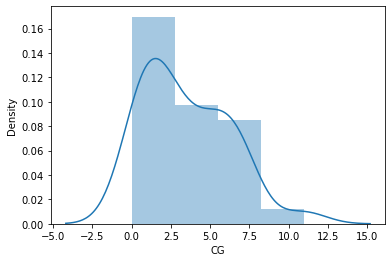

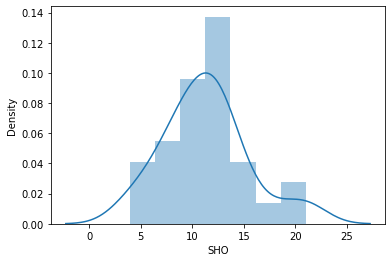

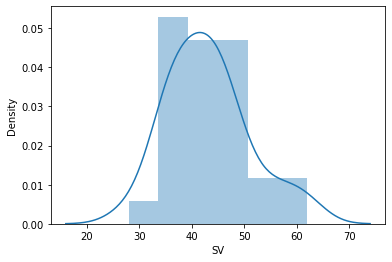

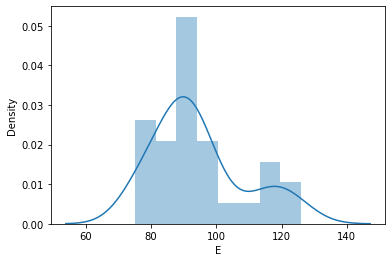

In [8]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

Almost all the columns are normally distributed.Except R, SO, CG and E.

Bivariate analysis:

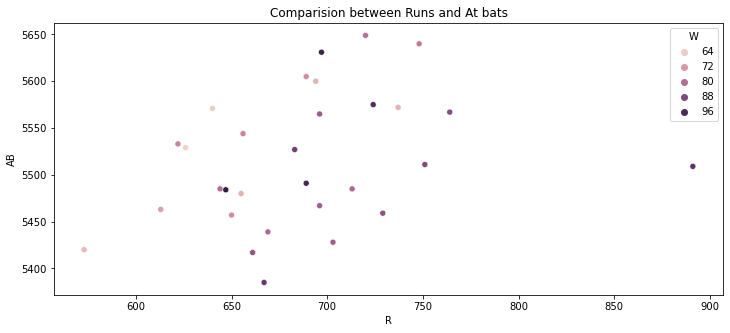

In [9]:
# Checking the relation between two variables
plt.figure(figsize=[12,5])
plt.title('Comparision between Runs and At bats')
sns.scatterplot(df['R'],df['AB'],hue=df["W"]);

It doesn't have any pattern ,as I can say that as the runs increasing wining number is also increasing, but At bats doesn't have that significance on wining.

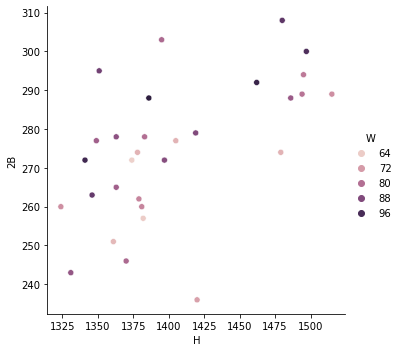

In [10]:
# Checking the relation between two variables
sns.relplot(x='H',y='2B',data=df,hue=df["W"]);

As the 2B is increaseing some what wining is also increseing, but H doesn't show any proper pattern.

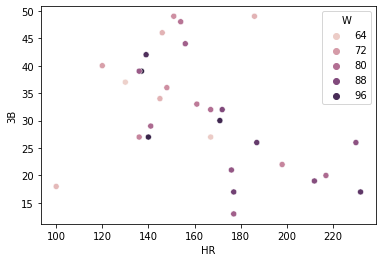

In [11]:
# Checking the relation between two variables
sns.scatterplot(df['HR'],df['3B'],data=df,hue=df["W"]);

HR with 3B also doesn't show any proper pattern.

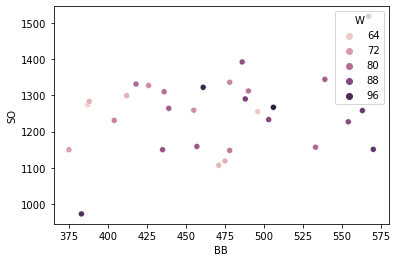

In [12]:
# Checking the relation between two variables
sns.scatterplot(df['BB'],df['SO'],data=df,hue=df["W"]);

BB and SO also doesn't show any proper pattern.

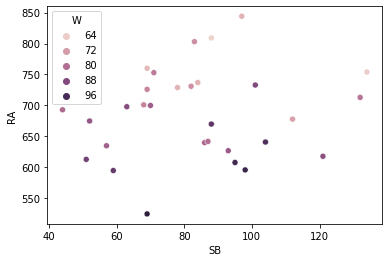

In [13]:
# Checking the relation between two variables
sns.scatterplot(df['SB'],df['RA'],data=df,hue=df["W"]);

RA and SB also doesn't show any proper pattern.

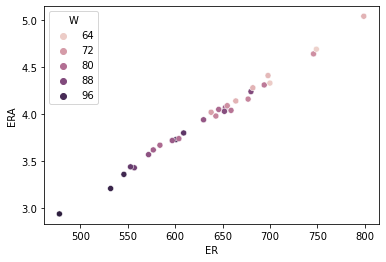

In [14]:
# Checking the relation between two variables
sns.scatterplot(df['ER'],df['ERA'],data=df,hue=df["W"]);

As ER and ERA are more then the winning number will be less, and if ERA and ER is less the wining number will be more.So ERA and ER are inversely proportional to winning number.

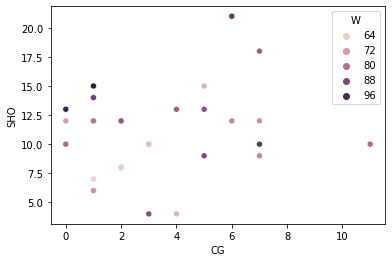

In [15]:
# Checking the relation between two variables
sns.scatterplot(df['CG'],df['SHO'],data=df,hue=df["W"]);

CG and SHO doesn't show any proper pattern.

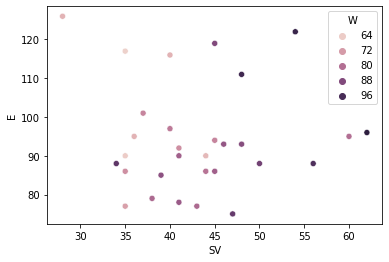

In [16]:
# Checking the relation between two variables
sns.scatterplot(df['SV'],df['E'],data=df,hue=df["W"]);

With less SV i can observe less winning number and E doesn't show any proper pattern.

Text(0, 0.5, 'Wins')

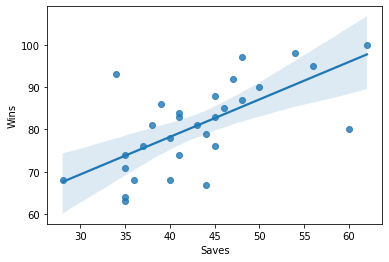

In [17]:
# Checking the relation between two variables
sns.regplot(df['SV'],df['W']);
plt.xlabel("Saves")
plt.ylabel("Wins")

Both of the features has linear relationship

Text(0, 0.5, 'Wins')

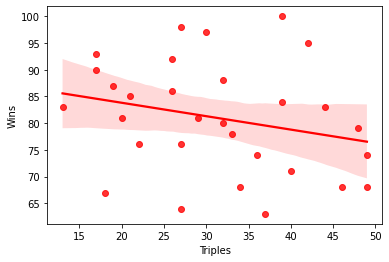

In [18]:
# Checking the relation between two variables
sns.regplot(df['3B'],df['W'],color="r");
plt.xlabel("Triples")
plt.ylabel("Wins")

I can observe a negative linear relation which mean above pair of features are inversely proportional to each other.

Text(0, 0.5, 'Wins')

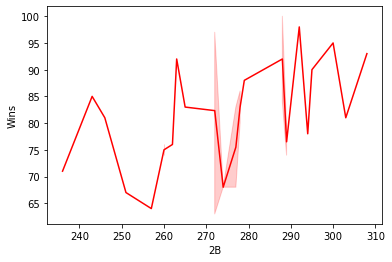

In [19]:
# Checking the relation between two variables
sns.lineplot(df['2B'],df['W'],color="r");
plt.xlabel("2B")
plt.ylabel("Wins")

If the number of doubles is high then the wining rate is also high.

Text(0, 0.5, 'Wins')

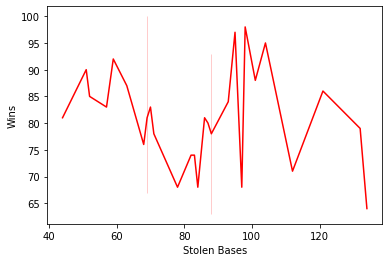

In [20]:
# Checking the relation between two variables
sns.lineplot(df['SB'],df['W'],color="r");
plt.xlabel("Stolen Bases")
plt.ylabel("Wins")

No proper visualization is given through these plot.

## Multivariate Analysis:

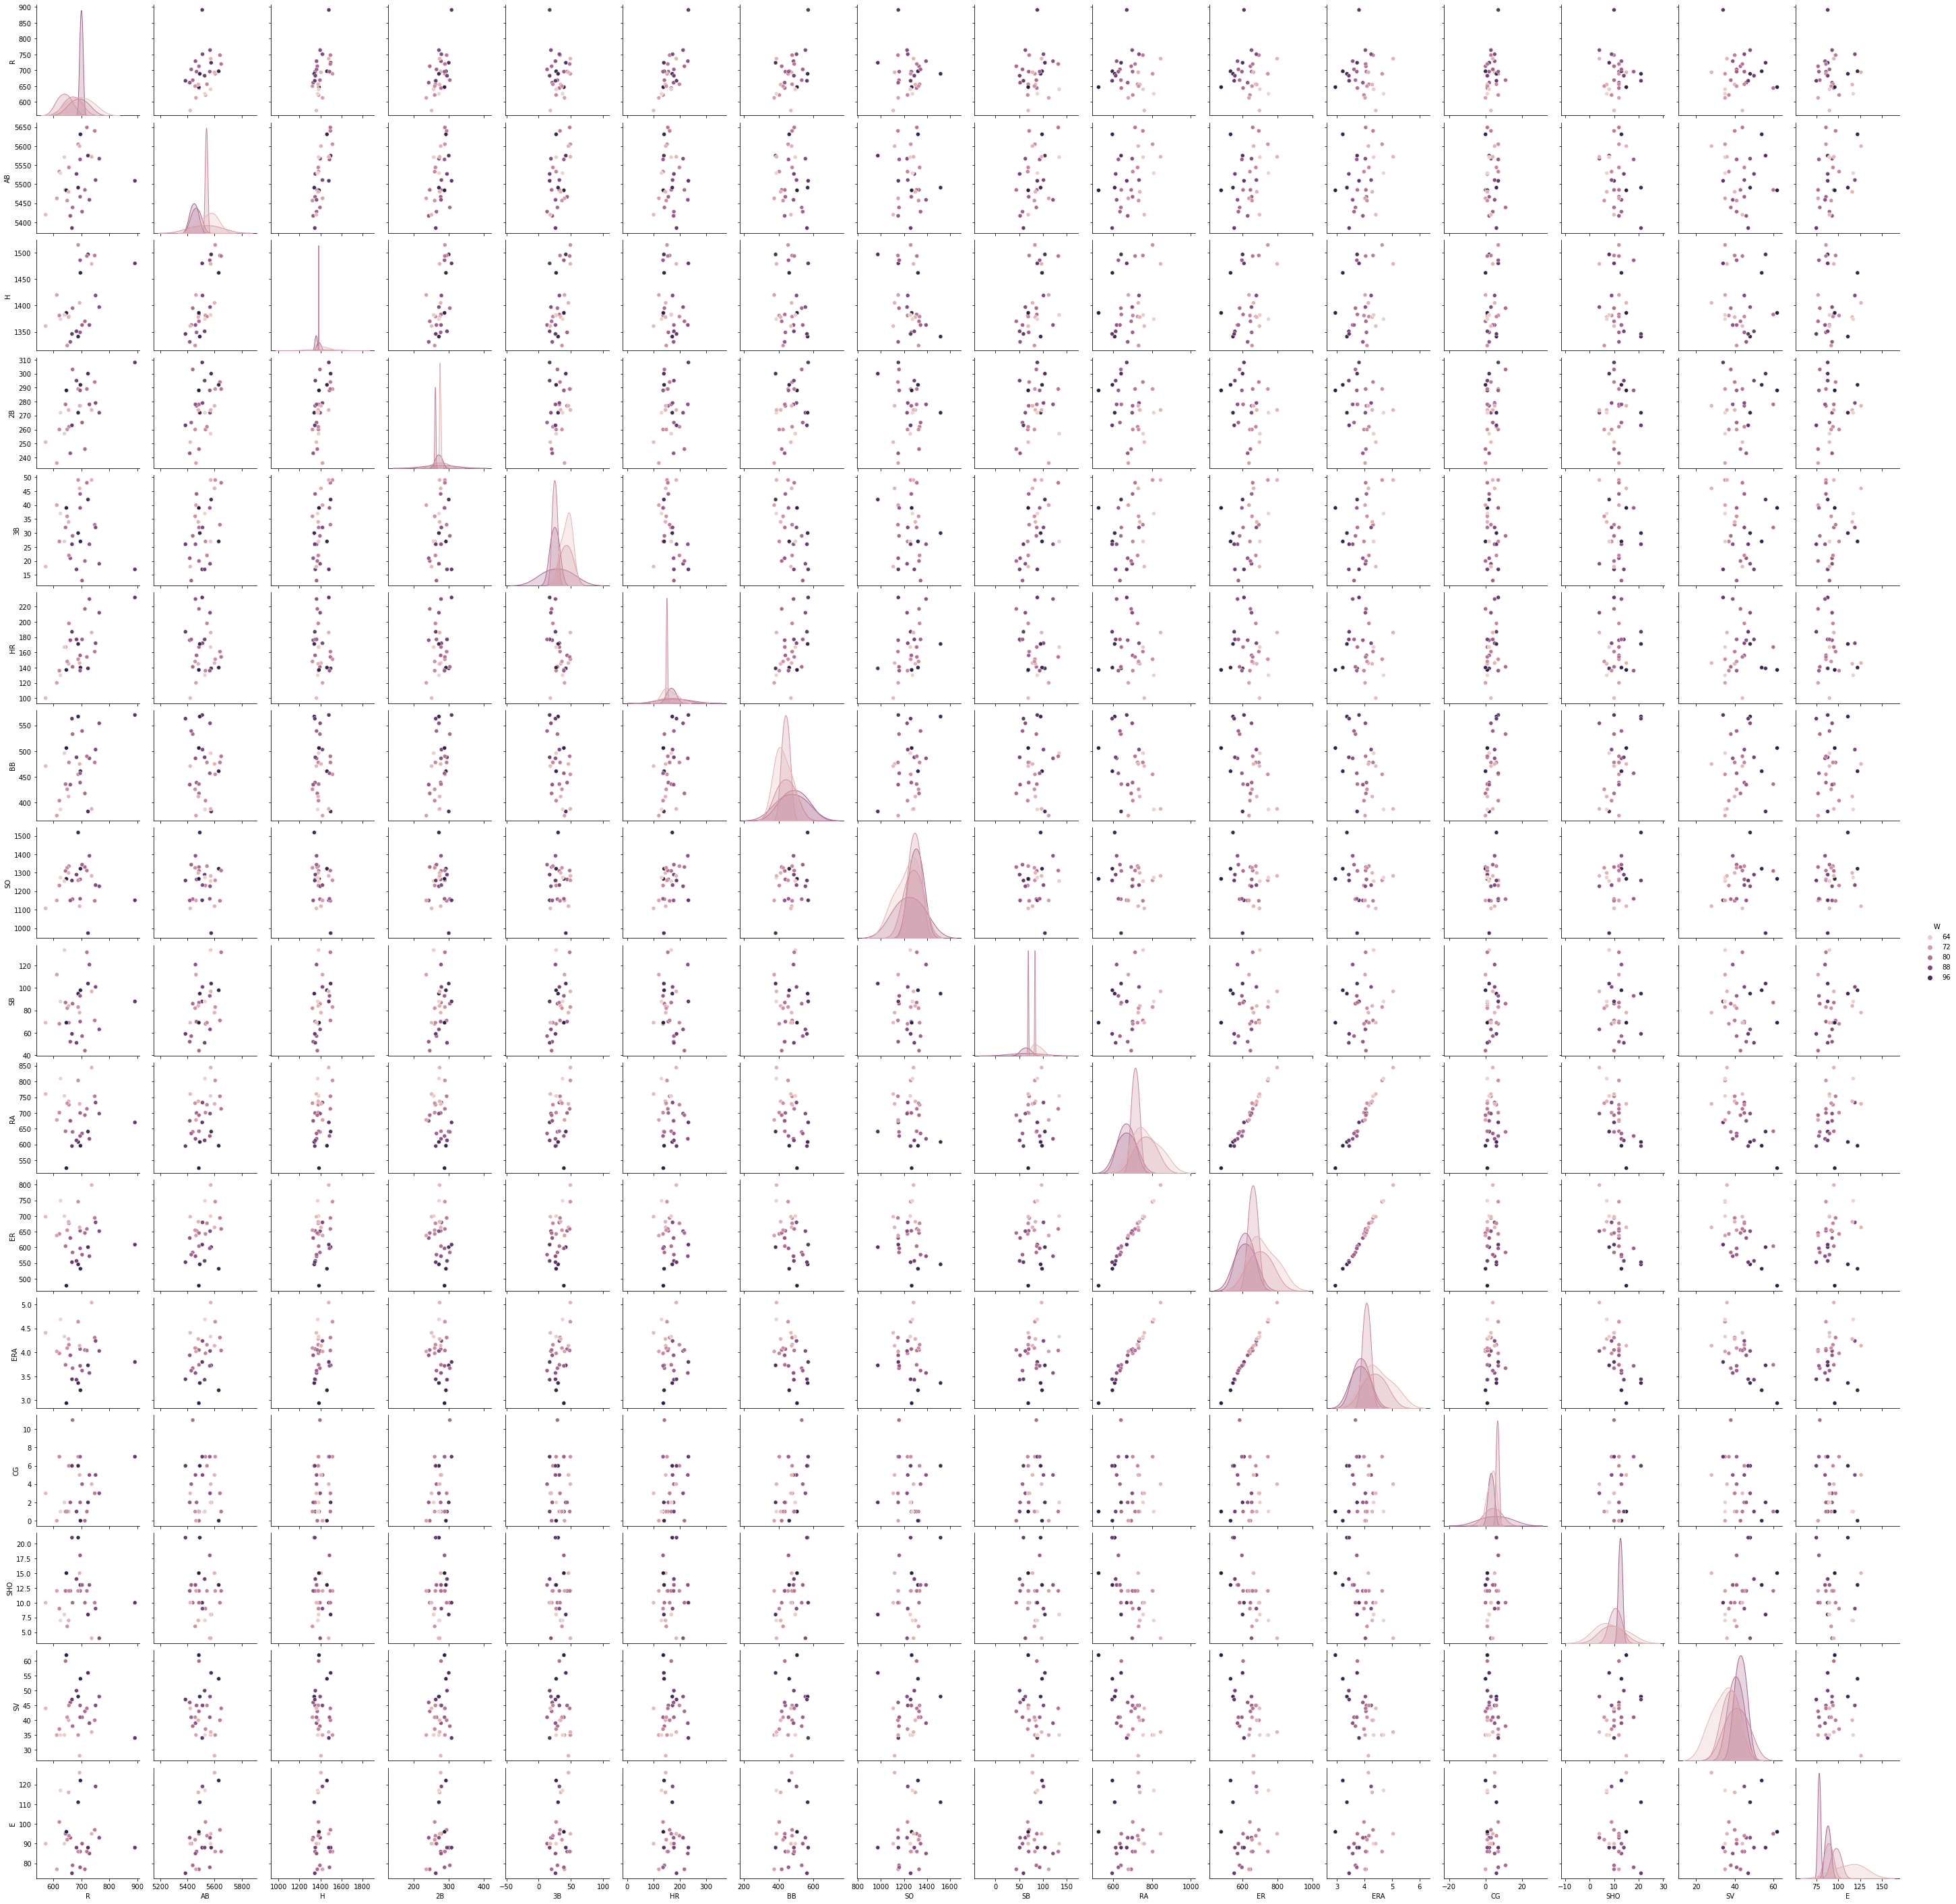

In [21]:
sns.pairplot(df,hue='W')

Above the pair plots of each pair of features.I can observe wheather they are making good correaltion or if they are just scattered with out any pattern.

## Data Cleaning:

## Checking for outliers:

<AxesSubplot:>

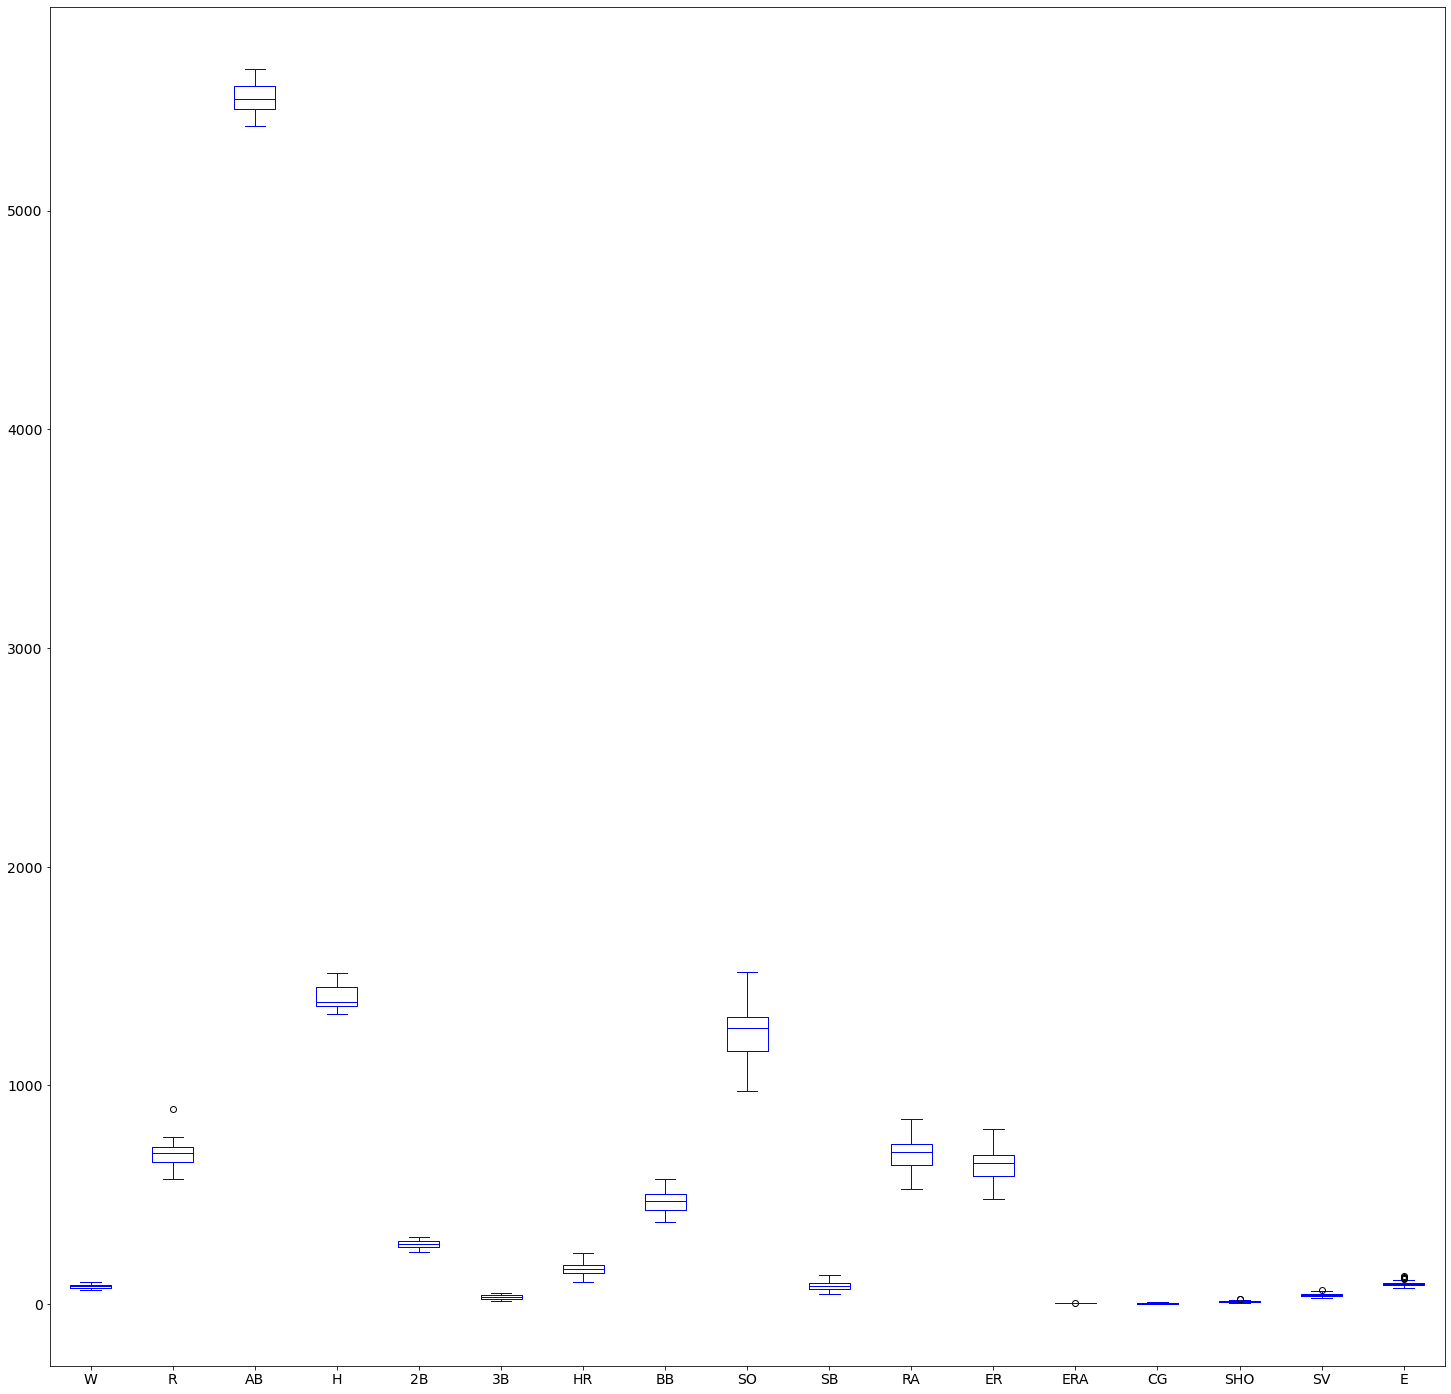

In [22]:
df.plot(kind='box',fontsize=14,figsize=(25,25),color='b')

By observing the box plot i can say that there are outliers in

R - Runs
ERA - Earned Run Average
SHO - Shutouts
SV - Saves
E - Errors

## Removing Outliers:
    



## i) Zscore method:

In [23]:
#Features having outliers
features=df[['R','ERA','SHO','SV','E']]

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


Using Zscore i have removed the outliers.

In [25]:
#Checking shape of new dataset
df_new.shape

(29, 17)

In [26]:
#Checking shape of old dataset
df.shape

(30, 17)

My old data set contains 30 rows and 17 columns.

In [27]:
#Checking dataloss
Dataloss = (((30-29)/30)*100)
Dataloss

3.3333333333333335

The data loss in zscore method after removing outliers is 3.33% which is less than 10%.Still let me have a look into IQR method.

## ii) IQR (Inter Quantile Range) method:

In [28]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Using IQR method i have removed the outliers.

In [29]:
#Checking shape of new dataset
df_1.shape

(20, 17)

After removing the outliers using IQR method i got 20 rows and 17 columns in my data set.

In [30]:
#Checking shape of old dataset
df.shape

(30, 17)

My old data set contains 30 rows and 17 columns.

In [31]:
#Checking data loss in IQR method
Dataloss = (((30-20)/30)*100)
Dataloss

33.33333333333333

I can notice a great data loss in IQR method.So let me stick on to zscore for removing outliers.

## Checking for skewness:

In [32]:
#Checking for skewness
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

I can notice that there is skewness in

H - Hits
CG - Complete games
SHO - Shutouts
SV - Saves
E - Errors

## Removing skewness :

In [34]:
#list of skewed features
skew_fea=["H","CG","SHO","SV","E"]

Taking all the columns with skewness as a list with variable skew_fea.

In [35]:
#Removing skewness in H using log1p
df_new["H"]=np.log1p(df_new["H"])

In [36]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson method i have removed the skewness in E.

In [37]:
#Removing skewness using yeo-johnson
df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)

These are my skew_fea after removing skewness.

In [38]:
#Checking skewness after removing skewness
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

It is soo good to see that the skewness is removed from the data set except H.

I have tried removing skewness in H using log, log1p, sqrt, cbrt and box-cox.Even after using all these methods i was able to remove 0.02 skewness from H column.
And after trying to remove skewness in H using yeo-johnson method i got 0.0 skewness, after this i checked correlation for all feature and found that the correlation of H with all the features was NaN.
So i decided to keep the skewness as it is since H has some relation with winning practically, So i can not drop this column right now.And i'm keeping the skewness which is 0.738455 of H column as it is and i'll move with my model training.

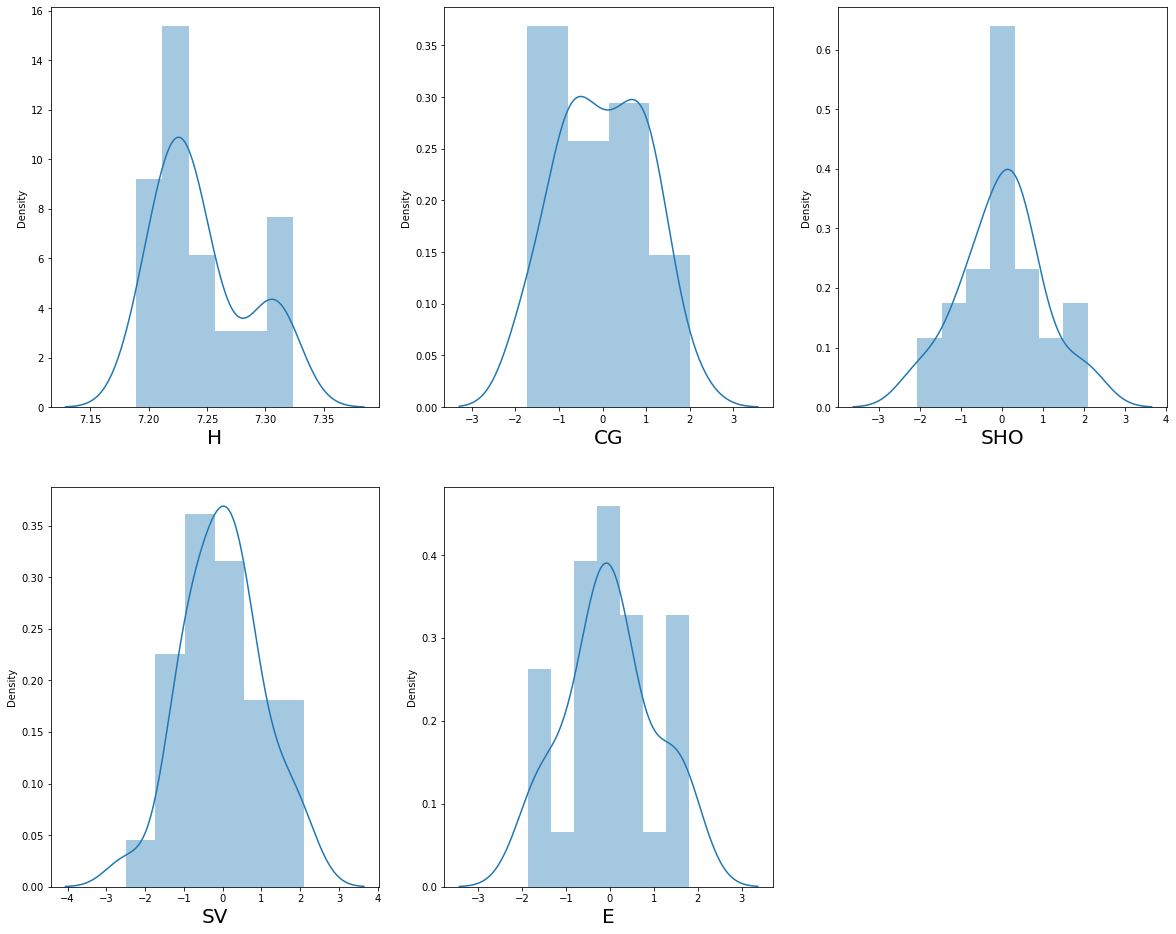

In [39]:
# After removing let's check how the data has been distributed in each column of skew_fea.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skew_fea]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

By observing the plot i can say that skewness is removed to some good extent.And the data is normally distributed now.

## Checking the correlation matrix using heat map:

In [40]:

cor=df_new.corr()

In [41]:

cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.020785,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.007696,0.481626,0.756713,-0.079633
R,0.390451,1.000000,0.438022,0.432236,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.155122,-0.113640,0.083261,0.039865
AB,-0.085780,0.438022,1.000000,0.770154,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.059648,-0.194219,-0.147964,0.332002
H,-0.020785,0.432236,0.770154,1.000000,0.527354,0.579735,-0.219201,-0.221773,-0.373301,0.420199,0.243639,0.279956,0.255886,0.071667,-0.129964,-0.103110,-0.020049
2B,0.384886,0.469293,0.490752,0.527354,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.227220,0.088226,0.241326,0.152541
3B,-0.206737,0.134204,0.445604,0.579735,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.004496,-0.066384,-0.269255,0.080498
HR,0.245697,0.586894,-0.064653,-0.219201,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.118284,-0.024448,0.106523,-0.165883
BB,0.447513,0.258450,-0.137850,-0.221773,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.445335,0.441043,0.207948,-0.056106
SO,0.156469,0.081158,-0.111243,-0.373301,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.063129,0.204704,0.125572,0.164817
SB,-0.169503,0.075323,0.373674,0.420199,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.040524,-0.100054,-0.195772,0.070527


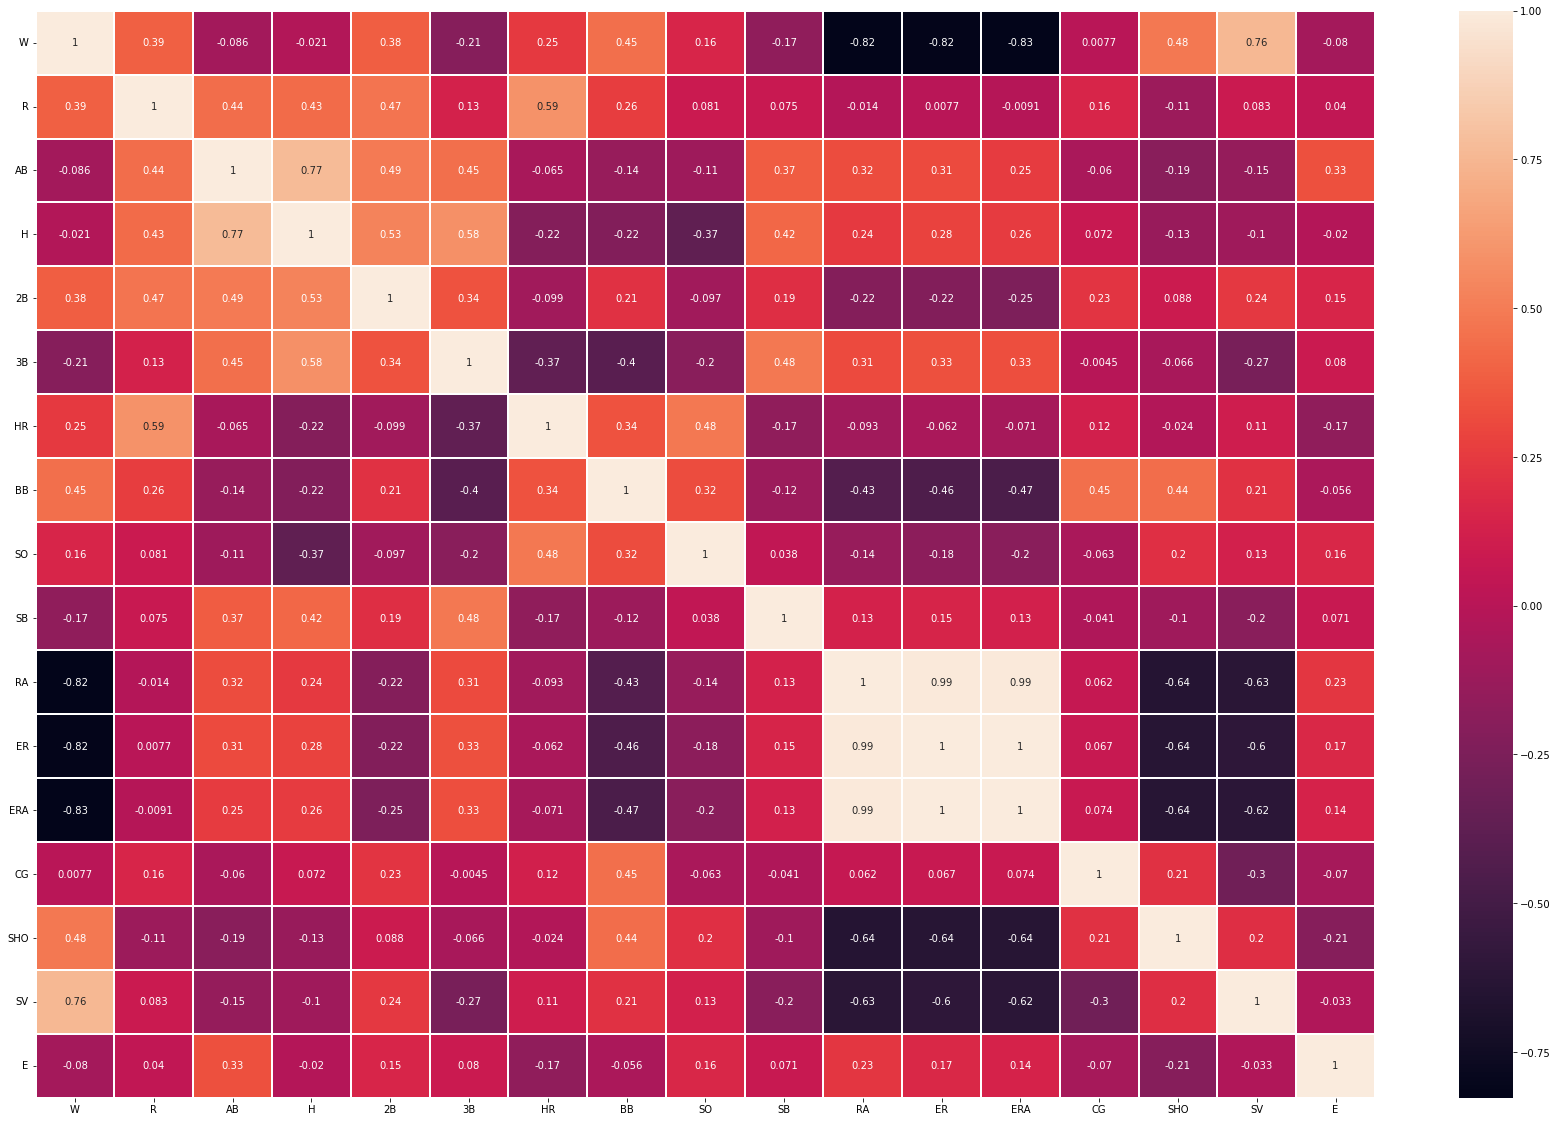

In [48]:
plt.figure(figsize=(30,20))
sns.heatmap(df_new.corr(),linewidths=.1,annot=True)
plt.yticks(rotation=0);

I can notice that target column W - No.of wins is very less correlated with

AB(At Bats)
H(Hits)
CG(Complete Games)
E(Errors)
And W-No.of wins is higly correlated with

RA(Run Allowed)
ER(Earned Runs)
ERA(Earned Runs Average)
SV(Saves)
And looking into the dependent features i can say that

RA, ER and ERA are higly correlated with each other.And also these columns has high negative correlation with target column.That means these columns has high impact on number of wins.
Since RA, ER and ERA acts as duplicates and all 3 columns has same kind of relation with target variable i can drop any two of them and keep other one for model training.
So i can that there is a multicolinearty issue in my dataset.So i need to get rid of it using VIF.

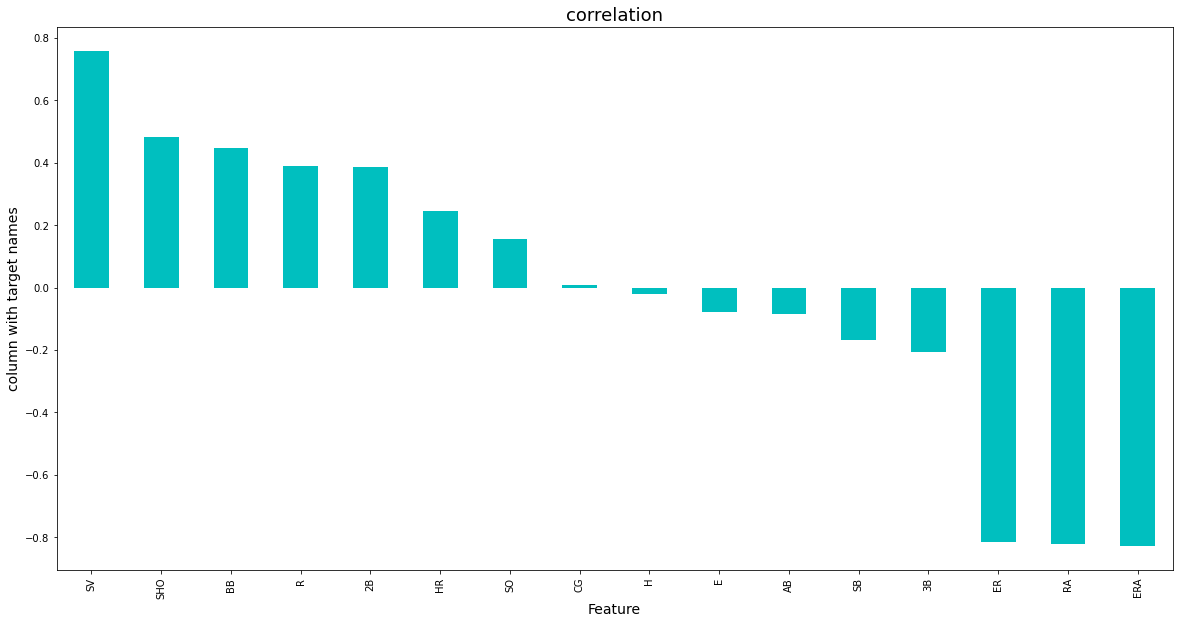

In [42]:
plt.figure(figsize=(20,10))
df_new.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

I can notice that CG and H are very less correlated with target column.So i have to drop them.

In [43]:
#Droping less correlated column
df_new = df_new.drop(["CG"],axis=1)
df_new = df_new.drop(["H"],axis=1)

In [44]:

df_new.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,-0.787002,1.532753,-0.348265
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,0.236737,0.312020,-0.540820
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,-0.252844,-0.664137,-1.326125
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,-0.513555,-0.820689,0.650818
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,0.236737,-1.149165,-0.540820


This is my data set after droping less correlated columns.

## Preprocessing:

In [45]:
x = df_new.drop("W",axis=1)
y = df_new["W"]

Assigned y as target variable and x as remaining features.

## Scaling data using StandardScaler:

In [46]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [47]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

Scaling data using standard scaler.

In [48]:
X.head()

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820


## Using VIF(Variance inflation factor) to remove multicolinearity:

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.219825,R
1,9.828077,AB
2,2.683572,2B
3,3.196853,3B
4,7.369072,HR
5,2.686472,BB
6,2.741072,SO
7,1.757901,SB
8,179.096825,RA
9,1754.643859,ER


By looking into the VIF values i can say that multicolinearity exists in RA, ER and ERA.So let me drop RA and ER columns to avoid multicolinearity.

In [57]:
#Droping ER
X = X.drop(["ER"],axis=1)

In [58]:
X.head(10)

,R,AB,2B,3B,HR,BB,SO,SB,RA,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.614123,-0.513555,0.312020,1.554265


These are my dependent variables after removing multicolinearity.

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.219825,R
1,9.828077,AB
2,2.683572,2B
3,3.196853,3B
4,7.369072,HR
5,2.686472,BB
6,2.741072,SO
7,1.757901,SB
8,179.096825,RA
9,1754.643859,ER


Still VIF is high for 2 columns so let me drop RA.

In [51]:
#Droping RA
X = X.drop(["RA"],axis=1)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,4.250076,R
1,2.238746,AB
2,2.597917,2B
3,3.030073,3B
4,4.562014,HR
5,2.222720,BB
6,2.042786,SO
7,1.568151,SB
8,3.878177,ERA
9,2.651314,SHO


Now the multicolinearity issue is solved.

## Finding Best Random State and Accuracy:

In [54]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = LinearRegression()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9502298163965955  on Random_state  104


I got the best Accuracy and Random state.

## Regression Algorithms:

In [55]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

## i) Linear Regression:

In [56]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6238294655117664
mean_squared_error: 38.03502070936585
mean_absolute_error: 5.37908468891143
root_mean_squared_error: 6.167253903429455


## ii) SGD:

In [57]:
sgd=SGDRegressor()
sgd.fit(X_train,y_train)
pred=sgd.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8969904532860862
mse: 10.415409723295733
mae: 2.4888813234182345
rmse: 3.2272913911352554


## iii) Lasso regressor:

In [58]:
#importing necessary library
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [59]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(X_train,y_train)
print(Z.best_params_)

{'alpha': 1, 'random_state': 0}


In [60]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,y_train)
pred=ls.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9073957675955282
mse: 9.3633168320077
mae: 2.5034432458720883
rmse: 3.0599537303703954


## iv) Ridge Regressor:

In [61]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(X_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'sparse_cg'}


In [62]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(X_train,y_train)
pred=rd.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8176178357276845
mse: 18.440863276423013
mae: 3.168484055418691
rmse: 4.294282626519011


## Cross_Validation_Score:

In [63]:
print(cross_val_score(lr,X,y,cv=5).mean())

0.4190171288774353


In [64]:
print(cross_val_score(sgd,X,y,cv=5).mean())

0.2553465676384727


In [65]:
print(cross_val_score(ls,X,y,cv=5).mean())

0.5182974315359173


In [66]:
print(cross_val_score(rd,X,y,cv=5).mean())

0.3825360858882291


Above are the cross validation scores of lr,sgd,ls and rd.

And i found that the difference between model accuracy and cross validation score is less for lasso.So lasso is my best model.

## HyperParameter tuning:

In [67]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [69]:
parameter = {'alpha':[0.01, 0.1, 1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':['bool']}

Giving lasso parameters.

In [70]:
GCV=GridSearchCV(Lasso(),parameter,cv=5)

In [71]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

Tuning the model with GCV.

In [72]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 6,
 'selection': 'random',
 'tol': 1000}

In [73]:
Final_mod=Lasso(alpha=1.0, fit_intercept="bool", max_iter=4, selection="random", tol=1000)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 68.5037208933955
mean_squared_error: 31.84623776334456
mean_absolute_error: 4.433700262068964
RMSE value: 5.643247093947292


## Saving the model:

In [75]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

## Predictions:

In [76]:
# Loading the saved model
model=joblib.load("BaseBallCaseStudy.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([88.87522527, 77.166736  , 79.69926935, 82.66921607, 95.80033508,
       77.04346754, 75.48999349, 77.66901202, 62.3954405 ])

Got the predictions using saving model.

In [78]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predictions","Original"])

,0,1,2,3,4,5,6,7,8
Predictions,88.875225,77.166736,79.699269,82.669216,95.800335,77.043468,75.489993,77.669012,62.395441
Original,98.000000,76.000000,79.000000,84.000000,100.000000,88.000000,74.000000,83.000000,68.000000


It is good to observe that the predictions and original values have very minor difference.

# --------------------------------------------------------------------------------------------------------